# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
# I'm using API 2.5, API 3.0 requires subscription and a banking card - I do not want to supply hem my card
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rongelap
Processing Record 2 of Set 1 | bandarbeyla
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | la foa
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | flying fish cove
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | bubaque
Processing Record 11 of Set 1 | taltal
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | pariaman
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | mahanoro
Processing Record 18 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 19 of Set 1 | cidade velha
Processing Record 20 of Set 1 | khandyga
Processing Record 21 of Set 1 | yahyali
Processing Record 22 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rongelap,11.1635,166.8941,29.02,78,8,7.39,MH,1727851331
1,bandarbeyla,9.4942,50.8122,29.19,62,6,7.09,SO,1727851332
2,waitangi,-43.9535,-176.5597,12.12,86,100,2.68,NZ,1727851333
3,grytviken,-54.2811,-36.5092,-6.57,79,21,4.90,GS,1727851335
4,la foa,-21.7108,165.8276,22.02,69,5,4.51,NC,1727851336


In [7]:
# Create 'output_data' directory if it doesn't exist
if not os.path.exists("output_data"):
    os.makedirs("output_data")
    
# Export the City_Data into a csv    
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rongelap,11.1635,166.8941,29.02,78,8,7.39,MH,1727851331
1,bandarbeyla,9.4942,50.8122,29.19,62,6,7.09,SO,1727851332
2,waitangi,-43.9535,-176.5597,12.12,86,100,2.68,NZ,1727851333
3,grytviken,-54.2811,-36.5092,-6.57,79,21,4.90,GS,1727851335
4,la foa,-21.7108,165.8276,22.02,69,5,4.51,NC,1727851336


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

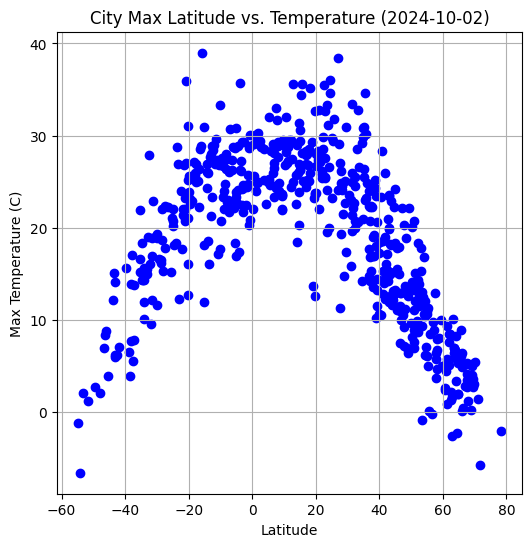

In [9]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(6, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='b')

# Incorporate the other graph properties
current_date = datetime.now().strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

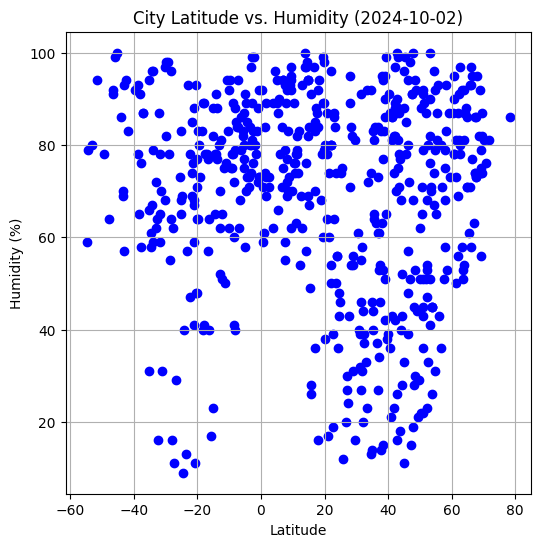

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(6, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='b')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

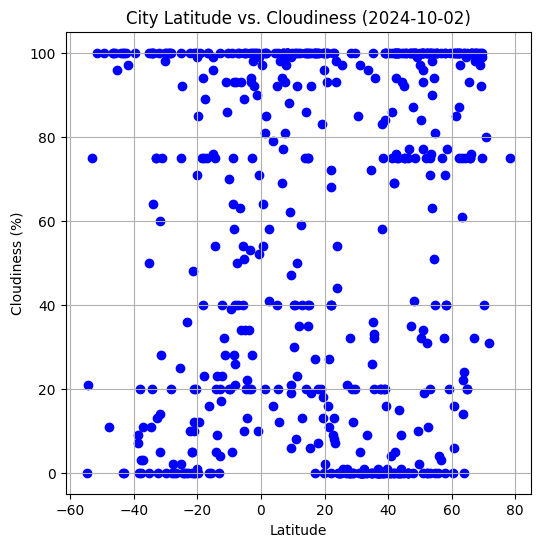

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(6, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='b')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

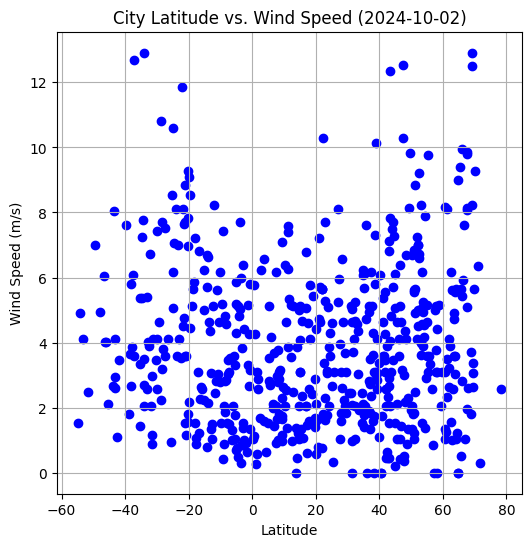

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='b')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def get_linregress(df: pd.DataFrame, x: str, y: str, current_date, title: str, y_axis_measurement = None):
    
    slope, intercept, r_value, p_value, std_err = linregress(df[x], df[y])

    plt.scatter(df[x], df[y], color='b')

    # Incorporate the other graph properties
    plt.title(f"{title} ({current_date})")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y} ({y_axis_measurement})' if y_axis_measurement is not None else f'{y}')
    
    regression_line = slope * df[x] + intercept
    plt.plot(df[x], regression_line, color='red', label=f'Regression Line\ny={slope:.2f}x+{intercept:.2f}')
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    mid_x = (df[x].min() + df[x].max()) / 2
    mid_y = (df[y].min() + df[y].max()) / 2
    plt.annotate(line_eq,(mid_x,mid_y),fontsize=15,color="red")
    
    plt.grid(True)

    # Show plot
    plt.show()
    
    return r_value

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rongelap,11.1635,166.8941,29.02,78,8,7.39,MH,1727851331
1,bandarbeyla,9.4942,50.8122,29.19,62,6,7.09,SO,1727851332
5,thompson,55.7435,-97.8558,0.09,93,0,3.60,CA,1727851337
8,whitehorse,60.7161,-135.0538,2.43,95,100,1.03,CA,1727851341
9,bubaque,11.2833,-15.8333,27.21,82,23,3.86,GW,1727851343


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,12.12,86,100,2.68,NZ,1727851333
3,grytviken,-54.2811,-36.5092,-6.57,79,21,4.90,GS,1727851335
4,la foa,-21.7108,165.8276,22.02,69,5,4.51,NC,1727851336
6,flying fish cove,-10.4217,105.6791,26.82,83,100,4.63,CX,1727851339
7,west island,-12.1568,96.8225,28.99,65,23,8.23,CC,1727851340


###  Temperature vs. Latitude Linear Regression Plot

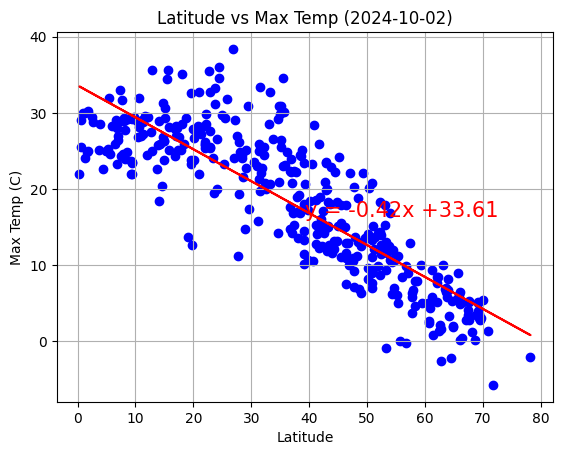

The r^2-value is: 0.7355269243752175


In [16]:
# Linear regression on Northern Hemisphere
r_value = get_linregress(northern_hemi_df, 'Lat', 'Max Temp', current_date, 'Latitude vs Max Temp', 'C')
print(f'The r^2-value is: {r_value*r_value}')

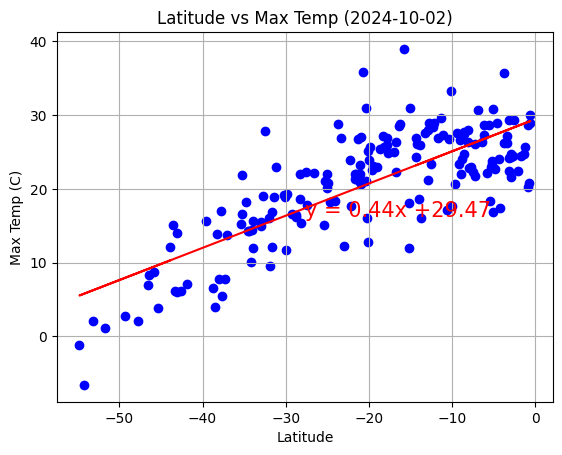

The r^2-value is: 0.6036548101538076


In [17]:
# Linear regression on Southern Hemisphere
r_value = get_linregress(southern_hemi_df, 'Lat', 'Max Temp', current_date, 'Latitude vs Max Temp', 'C')
print(f'The r^2-value is: {r_value*r_value}')

**Discussion about the linear relationship:** Linear regression seems to fit the data

### Humidity vs. Latitude Linear Regression Plot

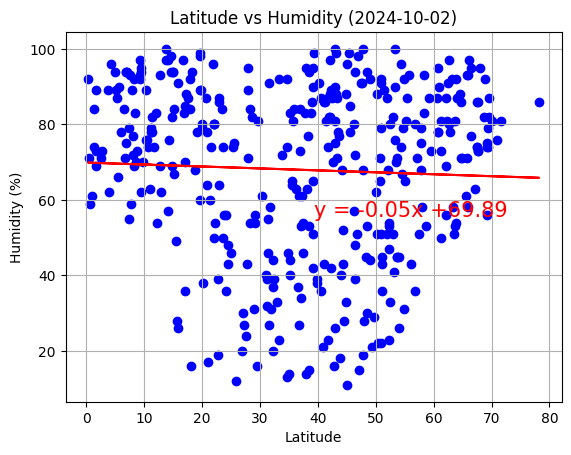

The r^2-value is: 0.0018909221222299052


In [18]:
# Northern Hemisphere
r_value = get_linregress(northern_hemi_df, 'Lat', 'Humidity', current_date, 'Latitude vs Humidity', '%')
print(f'The r^2-value is: {r_value*r_value}')

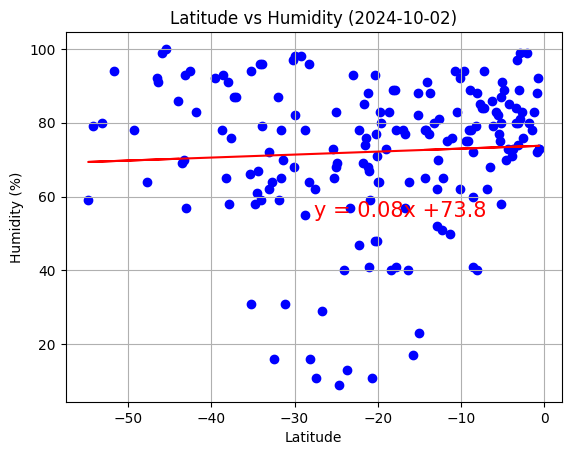

The r^2-value is: 0.0032162151000309142


In [19]:
# Southern Hemisphere
r_value = get_linregress(southern_hemi_df, 'Lat', 'Humidity', current_date, 'Latitude vs Humidity', '%')
print(f'The r^2-value is: {r_value*r_value}')

**Discussion about the linear relationship:** Linear regression poorly describes Humidity vs Latitude

### Cloudiness vs. Latitude Linear Regression Plot

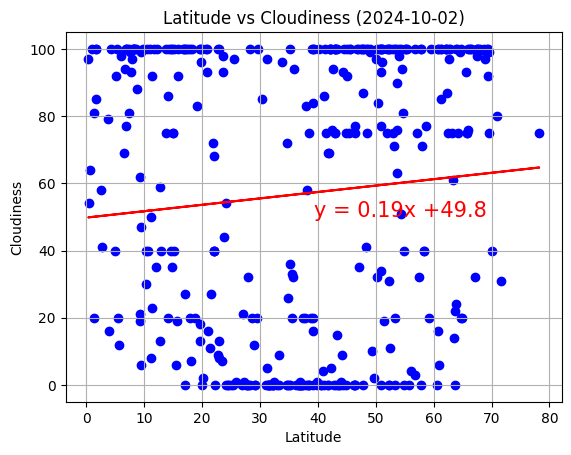

The r^2-value is: 0.007933028695378826


In [20]:
# Northern Hemisphere
r_value = get_linregress(northern_hemi_df, 'Lat', 'Cloudiness', current_date, 'Latitude vs Cloudiness')
print(f'The r^2-value is: {r_value*r_value}')

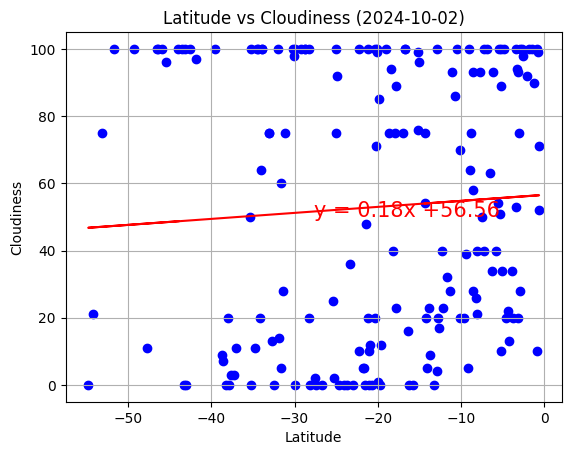

The r^2-value is: 0.003794474526756201


In [21]:
# Southern Hemisphere
r_value = get_linregress(southern_hemi_df, 'Lat', 'Cloudiness', current_date, 'Latitude vs Cloudiness')
print(f'The r^2-value is: {r_value*r_value}')

**Discussion about the linear relationship:** Linear regression poorly describes Cloudiness vs Latitude

### Wind Speed vs. Latitude Linear Regression Plot

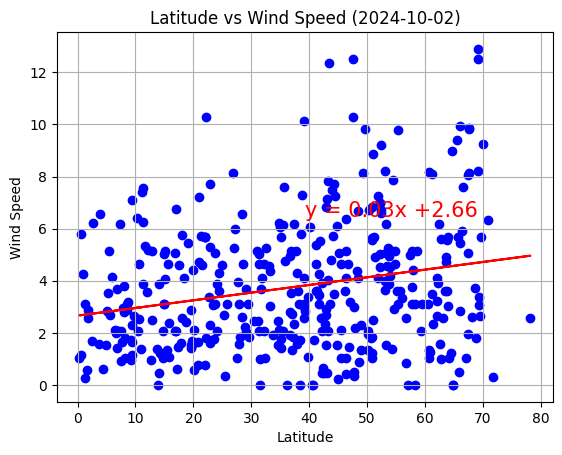

The r^2-value is: 0.053597469270955655


In [22]:
# Northern Hemisphere
r_value = get_linregress(northern_hemi_df, 'Lat', 'Wind Speed', current_date, 'Latitude vs Wind Speed')
print(f'The r^2-value is: {r_value*r_value}')

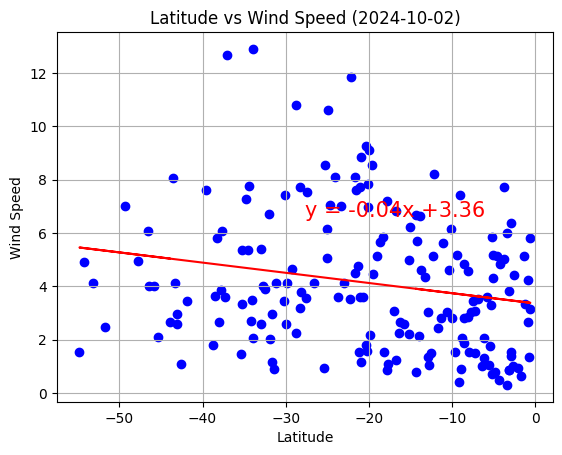

The r^2-value is: 0.04151487023874444


In [23]:
# Southern Hemisphere
r_value = get_linregress(southern_hemi_df, 'Lat', 'Wind Speed', current_date, 'Latitude vs Wind Speed')
print(f'The r^2-value is: {r_value*r_value}')

**Discussion about the linear relationship:** Linear regression poorly describes Cloudiness vs Latitude